# Day 77 - Computation with NumPy and N-Dimensional arrays

In this notebook we'll learn how to use NumPy to work with numerical data. 

**In this lesson we will look at how to:**

- Create arrays manually with np.array()

- Generate arrays using  .arange(), .random(), and .linspace()

- Analyse the shape and dimensions of a ndarray

- Slice and subset a ndarray based on its indices

- Do linear algebra like operations with scalars and matrix multiplication

- Use NumPys broadcasting to make ndarray shapes compatible

- Manipulate images in the form of ndarrays


<img src="https://i.imgur.com/dZ1XE9o.png" width=400>

# Import Statements

- SciPy: is an open source project providing "fundamental algorithms for scientific computing in Python", https://scipy.org/.
- PIL: Python Imaging Library, https://pypi.org/project/pillow/.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import scipy  # To get an image of a racoon!
from PIL import Image # for reading image files

# Understanding NumPy's ndarray

NumPy's most amazing feature is the **powerful** ndarray.

<img src="https://i.imgur.com/1IUqnxX.png" width=200>


- The __ndarray is a homogeneous n-dimensional array object__. What does that mean?

    - A Python List or a Pandas DataFrame can contain a mix of strings, numbers, or 
objects (i.e., a mix of different data types). __Homogenous__ means all the data must 
have the same data type, e.g., all floating-point numbers.

    - And __n-dimensional__ means that we can work with everything from a single column 
(1-dimensional) to the matrix (2-dimensional) to a bunch of matrices stacked on 
top of each other (n-dimensional).

The ``ndim`` and ``shape`` attributes show us the __number of dimensions__ and the __length of the axes__ respectively.

#### 1-Dimensional Arrays (Vectors)

In [2]:
# Create a 1-dimensional array (i.e., a "vector")
my_array = np.array(object=[1.1, 9.2, 8.1, 4.7])

# Get the shape
print("shape: ", my_array.shape)

# Show dimensions of an array
print("dimensions: ", my_array.ndim)

shape:  (4,)
dimensions:  1


In [3]:
# Access elements by index
my_array[2]

8.1

#### 2-Dimensional Arrays (sg: matrix, pl: matrices)

In [4]:
# Create a 2-dimensional array (note the two pairs of square brackets.)
array_2d = np.array([[1, 2, 3, 9], 
                     [5, 6, 7, 8]])

This array has 2 rows and 4 columns. NumPy refers to the dimensions as __axes__,
so the first axis has length 2 and the second axis has length 4.

In [5]:
print(f'array_2d has {array_2d.ndim} dimensions')
print(f'Its shape is {array_2d.shape}')
print(f'It has {array_2d.shape[0]} rows and {array_2d.shape[1]} columns')
print(array_2d)

array_2d has 2 dimensions
Its shape is (2, 4)
It has 2 rows and 4 columns
[[1 2 3 9]
 [5 6 7 8]]


__Access a particular row or value with the square bracket notation.__

To access a particular value, you have to provide an index for each dimension - for the row and for the column.

In [6]:
# Access the 3rd value in the 2nd row:
array_2d[1,2]

7

In [7]:
# Access all values in the first row
array_2d[0, :]

array([1, 2, 3, 9])

#### N-Dimensional Arrays (Tensors)
An array of 3 dimensions (or higher) is often referred to as a ”tensor”. A tensor refers to an n-dimensional array. 

Using what you've learned about 1- and 2-dimensional arrays, can you apply the same techniques to tackle a more complex array?

**Challenge**: 
* How many dimensions does the array below have? 
* What is its shape (i.e., how many elements are along each axis)?
* Try to access the value `18` in the last line of code.
* Try to retrieve a 1 dimensional vector with the values `[97, 0, 27, 18]`
* Try to retrieve a (3,2) matrix with the values `[[ 0,  4], [ 7,  5], [ 5, 97]]`

*Hint*: You can use the `:` operator just as with Python Lists.

In [8]:
mystery_array = np.array([[[0, 1, 2, 3],
                           [4, 5, 6, 7]],
                        
                         [[7, 86, 6, 98],
                          [5, 1, 0, 4]],
                          
                          [[5, 36, 32, 48],
                           [97, 0, 27, 18]]])
# Note all the square brackets!

In [9]:
print(f"Number of dimensions: {mystery_array.ndim = }")
print(f"Shape: {mystery_array.shape = }")
print(f"To access the value 18 in the last line of code: {mystery_array[2, 1, 3] = }",)
print(f"A 1-dimensional vector: {mystery_array[2, 1, :] = }\n")

# Retrieve all the first elements on the third axis, we can use the colon operator for the other two dimensions.
print(f"A (3,2) matrix: mystery_array[:,:,0] = \n{mystery_array[:, :, 0]}")

Number of dimensions: mystery_array.ndim = 3
Shape: mystery_array.shape = (3, 2, 4)
To access the value 18 in the last line of code: mystery_array[2, 1, 3] = 18
A 1-dimensional vector: mystery_array[2, 1, :] = array([97,  0, 27, 18])

A (3,2) matrix: mystery_array[:,:,0] = 
[[ 0  4]
 [ 7  5]
 [ 5 97]]


The shape is (3, 2, 4), so we have 3 elements along axis #0, 2 elements along axis #1 and 4 elements along axis #3.

__[How to convert a 1D array into a 2D array (how to add a new axis to an array)](https://numpy.org/doc/stable/user/absolute_beginners.html#how-to-convert-a-1d-array-into-a-2d-array-how-to-add-a-new-axis-to-an-array)__

In [10]:
a = np.array([1, 2, 3, 4, 5, 6])
print(f"{a.shape = }\n")
# You can explicitly convert a 1D array with either a row vector or a column vector using np.newaxis. For example, you can convert a 1D array to a row vector by inserting an axis along the first dimension:
row_vector = a[np.newaxis, :]
print(f"{row_vector.shape = }")
print(row_vector)

col_vector = a[:,np.newaxis]
print(f"\n{col_vector.shape = }")
print(col_vector)

a.shape = (6,)

row_vector.shape = (1, 6)
[[1 2 3 4 5 6]]

col_vector.shape = (6, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


# NumPy Mini-Challenges

#### **Challenge 1**: Use [`.arange()`](https://numpy.org/devdocs/reference/generated/numpy.arange.html)to createa a vector `a` with values ranging from 10 to 29. You should get this:

`print(a)`

`[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]`

In [11]:
a = np.arange(10, 30)
print(a)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]


#### **Challenge 2**: Use Python slicing techniques on `a` to:
* Create an array containing only the last 3 values of `a`
* Create a subset with only the 4th, 5th, and 6th values
* Create a subset of `a` containing all the values except for the first 12 (i.e., `[22, 23, 24, 25, 26, 27, 28, 29]`)
* Create a subset that only contains the even numbers (i.e, every second number)

In [12]:
print(a[-3:])
print(a[3:6])
print(a[12:])
print(a[::2])

[27 28 29]
[13 14 15]
[22 23 24 25 26 27 28 29]
[10 12 14 16 18 20 22 24 26 28]


#### **Challenge 3**:Reverse the order of the values in `a`, so that the first element comes last:

`[29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
       12, 11, 10]`


If you need a hint, you can check out this part of the [NumPy beginner's guide](
https://numpy.org/devdocs/user/absolute_beginners.html#how-to-reverse-an-array)

In [13]:
a[::-1]  # Reverse array with slicing

array([29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
       12, 11, 10])

In [14]:
np.flip(a)  # Reverse array with flip()

array([29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
       12, 11, 10])

#### **Challenge 4**: Print out all the indices of the non-zero elements in this array: [6,0,9,0,0,5,0]

In [15]:
arr = np.array([6, 0, 9, 0, 0, 5, 0])
print(arr)

print(np.nonzero(arr))

[6 0 9 0 0 5 0]
(array([0, 2, 5], dtype=int64),)


#### **Challenge 5**: Use NumPy to generate a 3x3x3 array with random numbers

Hint: Use the [`.random()` function](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random)

In [16]:
random_tensor_3x3 = np.ndarray(shape=(3, 3, 3))
random_tensor_3x3

array([[[1.15515421e-311, 8.00386346e-322, 0.00000000e+000],
        [0.00000000e+000, 6.23059386e-307, 1.15998412e-028],
        [4.31603868e-080, 1.94919985e-153, 1.35717430e+131]],

       [[1.05235379e-153, 1.05206244e-153, 1.05177110e-153],
        [1.05147976e-153, 1.05118842e-153, 1.05235322e-153],
        [1.05206187e-153, 1.05177053e-153, 6.01391519e-154]],

       [[1.05147919e-153, 1.94191242e-109, 4.90900643e+252],
        [1.94918511e-153, 6.32672800e+180, 4.74483502e+170],
        [4.59210323e-072, 2.56765133e-312, 1.26243262e+213]]])

In [17]:
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x22070AFECE0

In [18]:
rng.random(size=(3, 3, 3))

array([[[0.57276035, 0.00367092, 0.90372968],
        [0.51411759, 0.08546591, 0.58500613],
        [0.64950623, 0.37271295, 0.16463006]],

       [[0.793598  , 0.63984255, 0.31663764],
        [0.84162061, 0.31051347, 0.75767127],
        [0.19768601, 0.40710801, 0.51966094]],

       [[0.86410701, 0.08309246, 0.45821905],
        [0.19047752, 0.40688283, 0.34170686],
        [0.3831559 , 0.03584038, 0.95899867]]])

#### **Challenge 6**: Use [`.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create a vector `x` of size 9 with values spaced out evenly between 0 to 100 (both included).

In [19]:
# Create a vector x of size 9 with values spaced evenly between 0-100 (both included)
x = np.linspace(start=0, stop=100, num=9)
print(x)

[  0.   12.5  25.   37.5  50.   62.5  75.   87.5 100. ]


#### **Challenge 7**: Use [`.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create another vector `y` of size 9 with values between -3 to 3 (both included). Then plot `x` and `y` on a line chart using Matplotlib.

In [20]:
y = np.linspace(-3, 3, 9)
y

array([-3.  , -2.25, -1.5 , -0.75,  0.  ,  0.75,  1.5 ,  2.25,  3.  ])

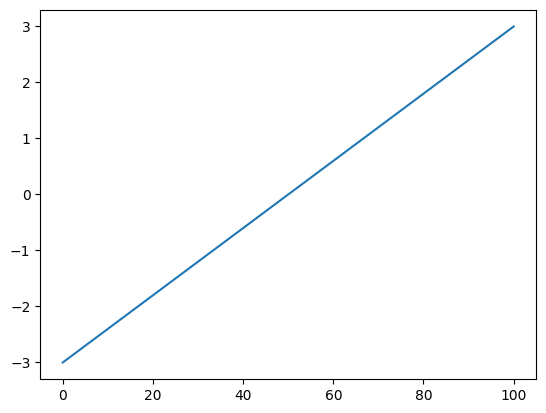

In [21]:
fig, ax = plt.subplots() # Create a figure containing a single axis
ax.plot(x, y)  # Plot x and y

#### **Challenge 8**: Use NumPy to generate an array called `noise` with shape 128x128x3 that has random values. Then use Matplotlib's [`.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to display the array as an image. 

When you have a 3-dimensional array with values between 0 and 1, we can use Matplotlib to interpret these values as the red-green-blue (RGB) values for a pixel.

In [22]:
noise = rng.random(size=(128, 128, 3))
noise.shape

(128, 128, 3)

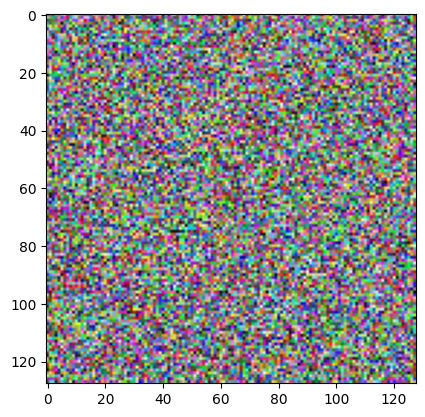

In [23]:
img = plt.imshow(X=noise)

We've just generated a 128x128 pixel image of random noise because each dimension in our NumPy array can be interpreted to hold the colour information for a pixel.

# Linear Algebra with Vectors
NumPy is designed to do math (and do it well!). This means that NumPy will treat vectors, matrices and tensors in a way that a mathematician would expect. For example, if you had two vector and add them together, the result is a ndarray where all the elements have been added together. Multiplying the two vectors together also results in an element by element operation, but for a Python List, this operation would not work at all.

In [24]:
v1 = np.array([4, 5, 2, 7])
v2 = np.array([2, 1, 3, 3])
print(f"{v1 = }\n{v2 = }\n")
print(f"{v1 + v2 = }")
print(f"{v1 * v2 = }")

v1 = array([4, 5, 2, 7])
v2 = array([2, 1, 3, 3])

v1 + v2 = array([ 6,  6,  5, 10])
v1 * v2 = array([ 8,  5,  6, 21])


In contrast, adding two Python lists would just concatenate the lists.

In [25]:
# Python Lists vs ndarrays
list1 = [4, 5, 2, 7]
list2 = [2, 1, 3, 3]

print(f"{list1 = }\n{list2 = }\n")
print(f"{list1 + list2 = }")
print("list1 * list2 --> TypeError: can't multiply sequence by non-int of type 'list'")  # --> TypeError: can't multiply sequence by non-int of type 'list'


list1 = [4, 5, 2, 7]
list2 = [2, 1, 3, 3]

list1 + list2 = [4, 5, 2, 7, 2, 1, 3, 3]
list1 * list2 --> TypeError: can't multiply sequence by non-int of type 'list'


# Broadcasting and Scalars
Oftentimes you'll want to do some sort of operation between an array and a single number. In mathematics, this single number is often called a **scalar**. For example, you might want to multiply every value in your NumPy array by 2.

In order to achieve this result, NumPy will make the shape of the smaller array - our scalar - compatible with the larger array. This is what the documentation refers to when it mentions the term "broadcasting".

The same rules about 'expanding' the smaller ndarray hold true for 2 or more dimensions. We can see this with a 2-Dimensional Array:

In [26]:
array_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
array_2d

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

The scalar operates on an element by element basis:

In [27]:
array_2d + 10

array([[11, 12, 13, 14],
       [15, 16, 17, 18]])

In [28]:
array_2d * 2

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16]])

# Matrix Multiplication with @ and .matmul()
But what if we're not multiplying our ndarray by a single number? What if we multiply it by another vector or a 2-dimensional array? In this case, we follow [the rules of linear algebra](https://en.wikipedia.org/wiki/Matrix_multiplication).
<img src=https://i.imgur.com/LCdhmi8.png width=350>
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/330px-Matrix_multiplication_diagram_2.svg.png width=350>

**(n,k), (k,m) -> (n,m)**

In [29]:
a1 = np.array([[1, 3],
               [0, 1],
               [6, 2],
               [9, 7]])

b1 = np.array([[4, 1, 3],
               [5, 8, 5]])

print(f'{a1.shape}: a has {a1.shape[0]} rows and {a1.shape[1]} columns.')
print(f'{b1.shape}: b has {b1.shape[0]} rows and {b1.shape[1]} columns.')
print('Dimensions of result: (4x2)*(2x3)=(4x3)')

(4, 2): a has 4 rows and 2 columns.
(2, 3): b has 2 rows and 3 columns.
Dimensions of result: (4x2)*(2x3)=(4x3)


**Challenge**: Let's multiply `a1` with `b1`. Looking at the wikipedia example above, work out the values for c12 and c33 on paper. Then use the [`.matmul()`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) function or the `@` operator to check your work. 

In [30]:
c = np.matmul(a1, b1)
print(c)
print(f"Matrix c has {c.shape[0]} rows and {c.shape[1]} columns.")

[[19 25 18]
 [ 5  8  5]
 [34 22 28]
 [71 65 62]]
Matrix c has 4 rows and 3 columns.


In [31]:
# The @ operator can be used as a shorthand for np.matmul on ndarrays.
a1 @ b1

array([[19, 25, 18],
       [ 5,  8,  5],
       [34, 22, 28],
       [71, 65, 62]])

# Manipulating Images as ndarrays

Images are nothing other than a collection of pixels. And each pixel is nothing other than value for a colour. And any colour can be represented as a combination of red, green, and blue (RGB).

You should two import statements at the top. Scipy and PIL will help us work with images. The Scipy library contains an image of a racoon in the datasets-module. We an fetch it with ``img = scipy.datasets.face()`` and display it using Matplotlib's ``plt.imshow()``

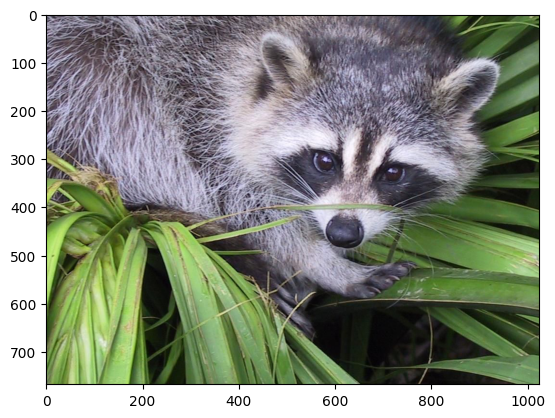

In [32]:
img = scipy.datasets.face()
plt.imshow(img)

**Challenge**: What is the **data type** of `img`? Also, what is the **shape** of `img` and **how many dimensions** does it have? What is the **resolution of the image**?

In [33]:
print(type(img))  # Datatype is numpy NDarray
print(img.shape)  # The shape is (768, 1024, 3)
print(img.ndim)  # 3 dimensions

<class 'numpy.ndarray'>
(768, 1024, 3)
3


There are three matrices stacked on top of each other - one for the red values, one for the green values and one for the blue values. Each matrix has a 768 rows and 1024 columns, which makes sense since 768x1024 is the resolution of the image.

**Convert the image to black and white** 

The values in our `img` range from 0 to 255.

All you need need to do is use a [formula](https://en.wikipedia.org/wiki/Grayscale#Colorimetric_(perceptual_luminance-preserving)_conversion_to_grayscale).

_For the common sRGB color space, gamma expansion is defined as_<br>
${\displaystyle Y_{\mathrm {linear} }=0.2126R_{\mathrm {linear} }+0.7152G_{\mathrm {linear} }+0.0722B_{\mathrm {linear} }}$

Y_linear is what we're after - our black and white image. However, this formula only works if our red, green and blue values are between 0 and 1 - namely in sRGB format. Currently the values in our img range from 0 to 255. So:

* Divide all the values by 255 to convert them to sRGB, where all the values are between 0 and 1. 
* Next, multiply the sRGB array by the `grey_vals` to convert the image to grey scale. 
* Finally use Matplotlib's [`.imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) together with the colormap parameter set to gray `cmap=gray` to look at the results. If we leave the cmap parameter out, the function will not know that is dealing with a black and white image.

In [34]:
# Divide all the values by 255 to convert them to sRGB. Here NumPy use broadcasting to divide all the values in our ndarray "img" by 255.
img_sRGB = img / 255  # sRGB array

(768, 1024)


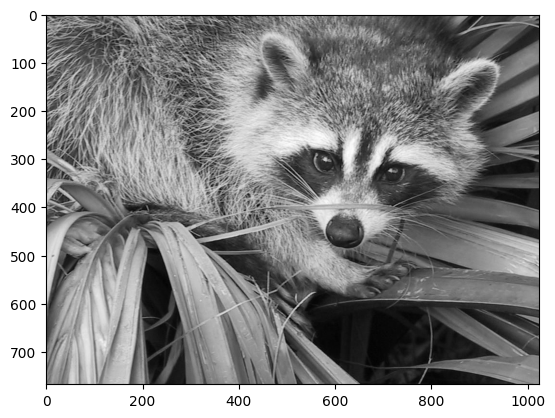

In [35]:
# Multiply the sRGB array by the grey_vals array (provided) to convert the image to grayscale.
grey_vals = np.array([0.2126, 0.7152, 0.0722])  # Values given by the formula above.

# Use matrix multiplication to multiply our two ndarrays together.
img_gray = np.matmul(img_sRGB, grey_vals)
# We could have used the @ operator like this: img_gray = sRGB_array @ grey_vals  
print(img_gray.shape)
plt.imshow(img_gray, cmap="gray")

**Challenge**: Can you manipulate the images by doing some operations on the underlying ndarrays? See if you can change the values in the ndarray to match the three images below.
<table>
<tr>
<td><img src=https://i.imgur.com/r36CigD.png></td>
<td><img src=https://i.imgur.com/IiNylco.png></td>
<td><img src=https://i.imgur.com/cfFbuex.png></td>
</tr>
<tr>
<td>Flip the grayscale image upside down</td>
<td>Rotate the colour image</td>
<td>Invert (i.e., solarize) the colour image. Tips: convert all pixels to their "opposite" value: black (0) becomes white (255).</td>
</tr>
</table>

#### Challenge Solutions

**1) flip the grayscale image upside down**

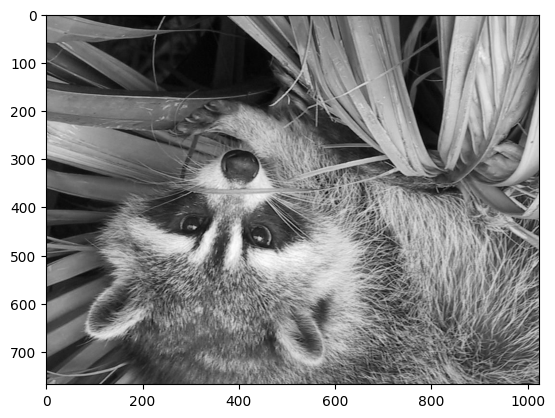

In [36]:
img_gray_upside_down = np.flip(img_gray)
plt.imshow(img_gray_upside_down, cmap="gray")

**2) Rotate the colour image**

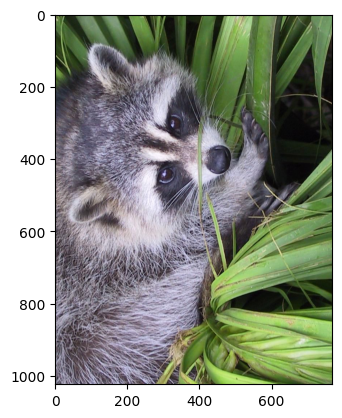

In [37]:
img_rotated = np.rot90(img, k=1, axes=(0, 1))
plt.imshow(img_rotated)

**3) Invert (i.e., solarize) the colour image.** To do this you need to converting all the pixels to their "opposite" value, so black (0) becomes white (255).

Inverting the colour image is a bit more tricky. It involved making use of NumPy's ability to broadcast when doing operations with a scalar. In this case, our scalar is 255 - the maximum value for a pixel in RGB (see gif at the very top). If we subtract the values of our img from 255, then we get the opposite value for each pixel:

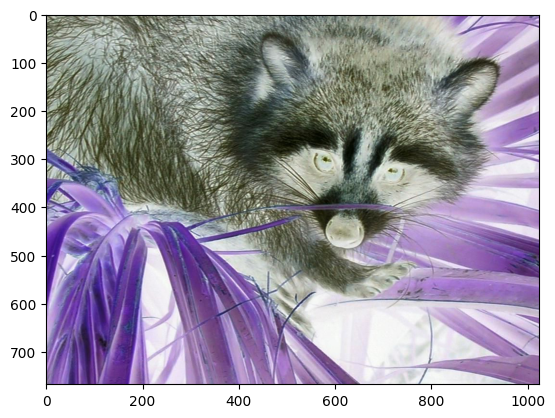

In [38]:
solar_img = 255 - img
plt.imshow(solar_img)

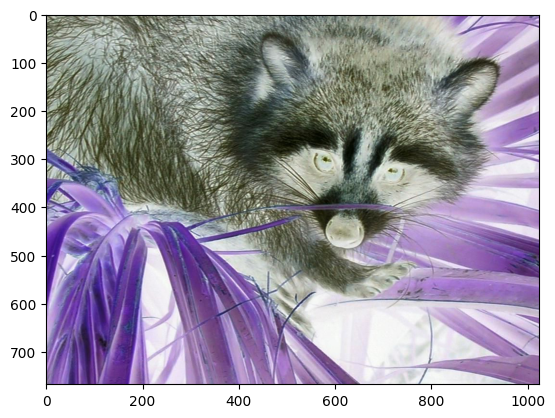

In [39]:
img_inverted = np.invert(img)
plt.imshow(img_inverted)

# Use your Own Image!

I've provided a .jpg file in the starting .zip file, so you can try your code out with an image that isn't a racoon 🦝. The key is that your image should have 3 channels (red-green-blue). If you use a .png file with 4 channels there are additional pre-processing steps involved to replicate what we're doing here.

In [40]:
file_name = 'yummy_macarons.jpg'

#### Use PIL to open the jpg-file

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(533, 799, 3)


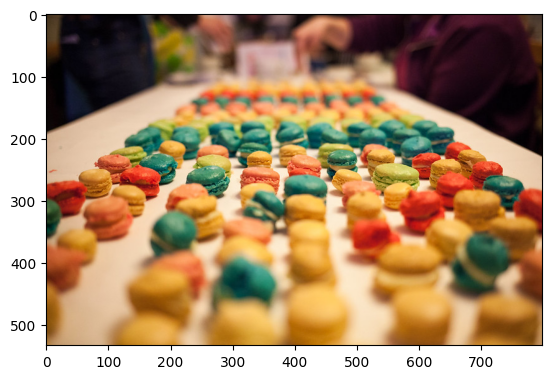

In [41]:
mac_img = Image.open(file_name)
print(type(mac_img))

mac_img_array = np.array(mac_img)
print(mac_img_array.shape)

plt.imshow(mac_img_array)

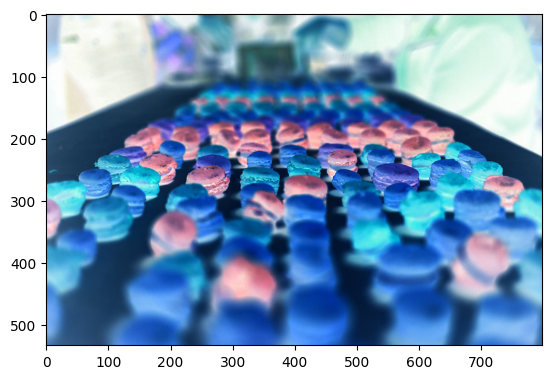

In [42]:
plt.imshow(255 - mac_img_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(533, 799, 3)


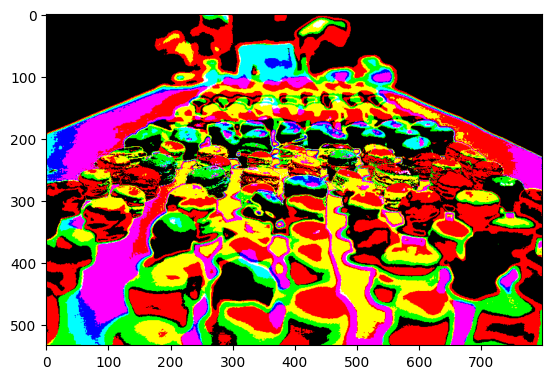

In [43]:
new_array = mac_img_array * -2 * mac_img_array
print(new_array.shape)
plt.imshow(new_array)

(533, 799, 3)


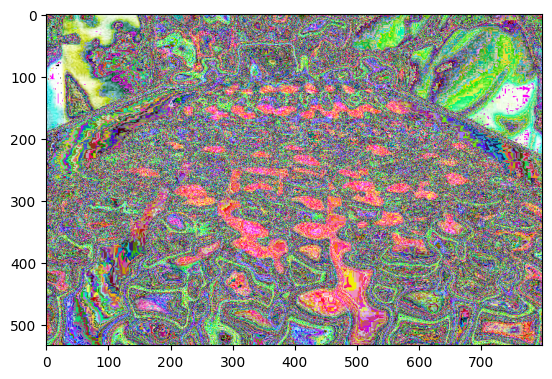

In [44]:
new_array = -mac_img_array * mac_img_array
print(new_array.shape)
plt.imshow(new_array)

(533, 799, 3)


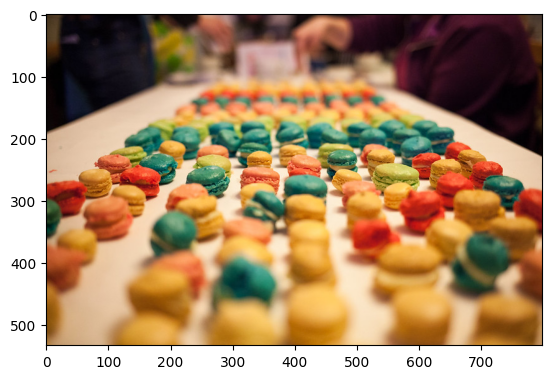

In [45]:
new_array = mac_img_array
print(new_array.shape)
plt.imshow(new_array)

(533, 799, 3)


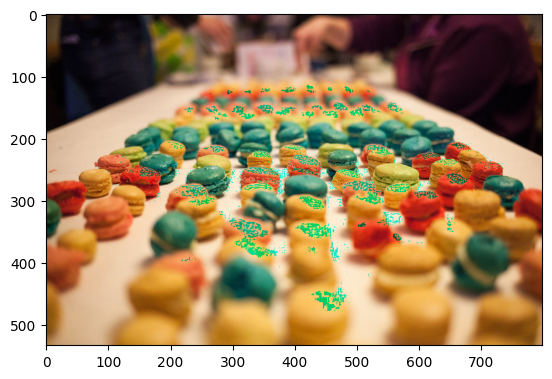

In [46]:
new_array = mac_img_array + 1
print(new_array.shape)
plt.imshow(new_array)

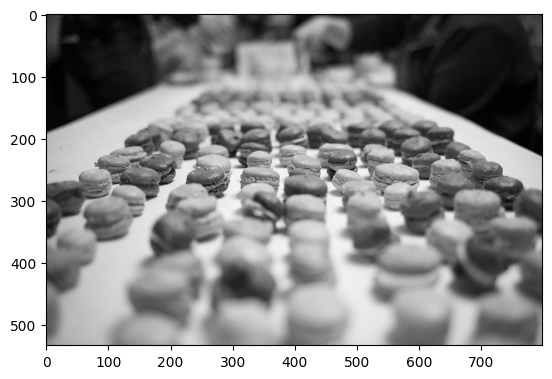

In [47]:
npimage = np.array(Image.open(file_name).convert("L"))
plt.imshow(npimage, cmap="gray")

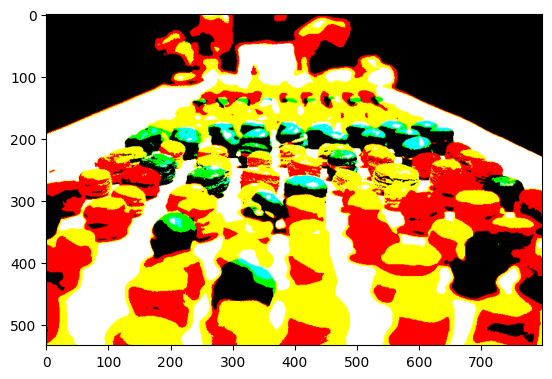

In [48]:
img = np.array(Image.open(file_name))
new_img = np.round((img - np.min(img)) / (np.max(img)-(np.min(img))))
plt.imshow(new_img)

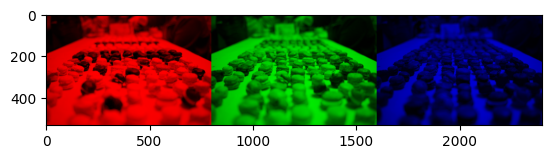

In [49]:
im_Red = img.copy()
im_Red[:, :, (1, 2)] = 0
im_Green = img.copy()
im_Green[:, :, (0, 2)] = 0
im_Blue = img.copy()
im_Blue[:, :, (0, 1)] = 0
 
im_RGB = np.concatenate((im_Red, im_Green, im_Blue), axis=1) 
 
plt.imshow(im_RGB)